# Bag of Words (BoW) vs TF-IDF: Text Feature Extraction
## A Comparative Analysis with English and Nepali Datasets

This notebook demonstrates:
1. Creating custom datasets in English and Nepali
2. Implementing Bag of Words (BoW) feature extraction
3. Implementing TF-IDF feature extraction
4. Comparing both methods and understanding their differences

## 1. Setup and Imports

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

# For better display
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Creating Custom Datasets

### 2.1 English Dataset
A collection of sentences about technology and nature.

In [2]:
# English Dataset - Technology and Nature themed
english_documents = [
    "Machine learning is a subset of artificial intelligence",
    "Deep learning uses neural networks for complex tasks",
    "Natural language processing helps computers understand human language",
    "The forest is home to many wild animals and birds",
    "Rivers flow through valleys and provide water to villages",
    "Mountains are covered with snow during winter season",
    "Artificial intelligence is transforming the technology industry",
    "Data science combines statistics and machine learning techniques",
    "The beautiful garden has many colorful flowers and plants",
    "Climate change affects forests and wildlife across the world"
]

# Display the dataset
print("English Dataset:")
print("="*60)
for i, doc in enumerate(english_documents, 1):
    print(f"Doc {i}: {doc}")

English Dataset:
Doc 1: Machine learning is a subset of artificial intelligence
Doc 2: Deep learning uses neural networks for complex tasks
Doc 3: Natural language processing helps computers understand human language
Doc 4: The forest is home to many wild animals and birds
Doc 5: Rivers flow through valleys and provide water to villages
Doc 6: Mountains are covered with snow during winter season
Doc 7: Artificial intelligence is transforming the technology industry
Doc 8: Data science combines statistics and machine learning techniques
Doc 9: The beautiful garden has many colorful flowers and plants
Doc 10: Climate change affects forests and wildlife across the world


### 2.2 Nepali Dataset
A collection of sentences about education and daily life.

In [3]:
# Nepali Dataset - Education and Daily Life themed
nepali_documents = [
    "नेपाल एक सुन्दर देश हो",
    "काठमाडौं नेपालको राजधानी हो",
    "विद्यार्थीहरू विद्यालयमा पढ्छन्",
    "शिक्षा जीवनको महत्वपूर्ण भाग हो",
    "हिमालय नेपालको गौरव हो",
    "नेपाली भाषा हाम्रो राष्ट्रिय भाषा हो",
    "कम्प्युटर शिक्षा आजकल धेरै महत्वपूर्ण छ",
    "विद्यार्थीहरूले मेहनत गर्नुपर्छ",
    "प्रविधि शिक्षा क्षेत्रमा परिवर्तन ल्याउँछ",
    "नेपालको संस्कृति धेरै समृद्ध छ"
]

# Display the dataset
print("Nepali Dataset:")
print("="*60)
for i, doc in enumerate(nepali_documents, 1):
    print(f"Doc {i}: {doc}")

Nepali Dataset:
Doc 1: नेपाल एक सुन्दर देश हो
Doc 2: काठमाडौं नेपालको राजधानी हो
Doc 3: विद्यार्थीहरू विद्यालयमा पढ्छन्
Doc 4: शिक्षा जीवनको महत्वपूर्ण भाग हो
Doc 5: हिमालय नेपालको गौरव हो
Doc 6: नेपाली भाषा हाम्रो राष्ट्रिय भाषा हो
Doc 7: कम्प्युटर शिक्षा आजकल धेरै महत्वपूर्ण छ
Doc 8: विद्यार्थीहरूले मेहनत गर्नुपर्छ
Doc 9: प्रविधि शिक्षा क्षेत्रमा परिवर्तन ल्याउँछ
Doc 10: नेपालको संस्कृति धेरै समृद्ध छ


## 3. Bag of Words (BoW) Implementation

### What is Bag of Words?
BoW represents text as a collection of words, disregarding grammar and word order. Each document becomes a vector of word counts.

**Formula:** For each word w in vocabulary V:
```
BoW(w, d) = count of word w in document d
```

### 3.1 BoW for English Dataset

In [4]:
# Initialize CountVectorizer for BoW
bow_vectorizer_en = CountVectorizer()

# Fit and transform the English documents
bow_matrix_en = bow_vectorizer_en.fit_transform(english_documents)

# Get feature names (vocabulary)
bow_features_en = bow_vectorizer_en.get_feature_names_out()

# Convert to DataFrame for better visualization
bow_df_en = pd.DataFrame(
    bow_matrix_en.toarray(),
    columns=bow_features_en,
    index=[f'Doc_{i+1}' for i in range(len(english_documents))]
)

print("Bag of Words Matrix (English):")
print(f"Shape: {bow_matrix_en.shape}")
print(f"Vocabulary Size: {len(bow_features_en)}")
print("\nVocabulary:", list(bow_features_en))
print("\nBoW Matrix:")
bow_df_en

Bag of Words Matrix (English):
Shape: (10, 66)
Vocabulary Size: 66

Vocabulary: ['across', 'affects', 'and', 'animals', 'are', 'artificial', 'beautiful', 'birds', 'change', 'climate', 'colorful', 'combines', 'complex', 'computers', 'covered', 'data', 'deep', 'during', 'flow', 'flowers', 'for', 'forest', 'forests', 'garden', 'has', 'helps', 'home', 'human', 'industry', 'intelligence', 'is', 'language', 'learning', 'machine', 'many', 'mountains', 'natural', 'networks', 'neural', 'of', 'plants', 'processing', 'provide', 'rivers', 'science', 'season', 'snow', 'statistics', 'subset', 'tasks', 'techniques', 'technology', 'the', 'through', 'to', 'transforming', 'understand', 'uses', 'valleys', 'villages', 'water', 'wild', 'wildlife', 'winter', 'with', 'world']

BoW Matrix:


,across,affects,and,animals,are,artificial,beautiful,birds,change,climate,colorful,combines,complex,computers,covered,data,deep,during,flow,flowers,for,forest,forests,garden,has,helps,home,human,industry,intelligence,is,language,learning,machine,many,mountains,natural,networks,neural,of,plants,processing,provide,rivers,science,season,snow,statistics,subset,tasks,techniques,technology,the,through,to,transforming,understand,uses,valleys,villages,water,wild,wildlife,winter,with,world
Doc_1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Doc_2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
Doc_3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,2,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
Doc_4,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0
Doc_5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,1,0,0,0,0,0
Doc_6,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
Doc_7,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0
Doc_8,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Doc_9,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
Doc_10,1,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1


### 3.2 BoW for Nepali Dataset

In [5]:
# For Nepali, we need to handle the script properly
# Using a simple whitespace tokenizer since default may not work well with Devanagari
bow_vectorizer_np = CountVectorizer(token_pattern=r'[\u0900-\u097F]+')

# Fit and transform the Nepali documents
bow_matrix_np = bow_vectorizer_np.fit_transform(nepali_documents)

# Get feature names
bow_features_np = bow_vectorizer_np.get_feature_names_out()

# Convert to DataFrame
bow_df_np = pd.DataFrame(
    bow_matrix_np.toarray(),
    columns=bow_features_np,
    index=[f'Doc_{i+1}' for i in range(len(nepali_documents))]
)

print("Bag of Words Matrix (Nepali):")
print(f"Shape: {bow_matrix_np.shape}")
print(f"Vocabulary Size: {len(bow_features_np)}")
print("\nVocabulary:", list(bow_features_np))
print("\nBoW Matrix:")
bow_df_np

Bag of Words Matrix (Nepali):
Shape: (10, 34)
Vocabulary Size: 34

Vocabulary: ['आजकल', 'एक', 'कम्प्युटर', 'काठमाडौं', 'क्षेत्रमा', 'गर्नुपर्छ', 'गौरव', 'छ', 'जीवनको', 'देश', 'धेरै', 'नेपाल', 'नेपालको', 'नेपाली', 'पढ्छन्', 'परिवर्तन', 'प्रविधि', 'भाग', 'भाषा', 'महत्वपूर्ण', 'मेहनत', 'राजधानी', 'राष्ट्रिय', 'ल्याउँछ', 'विद्यार्थीहरू', 'विद्यार्थीहरूले', 'विद्यालयमा', 'शिक्षा', 'संस्कृति', 'समृद्ध', 'सुन्दर', 'हाम्रो', 'हिमालय', 'हो']

BoW Matrix:


,आजकल,एक,कम्प्युटर,काठमाडौं,क्षेत्रमा,गर्नुपर्छ,गौरव,छ,जीवनको,देश,धेरै,नेपाल,नेपालको,नेपाली,पढ्छन्,परिवर्तन,प्रविधि,भाग,भाषा,महत्वपूर्ण,मेहनत,राजधानी,राष्ट्रिय,ल्याउँछ,विद्यार्थीहरू,विद्यार्थीहरूले,विद्यालयमा,शिक्षा,संस्कृति,समृद्ध,सुन्दर,हाम्रो,हिमालय,हो
Doc_1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
Doc_2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
Doc_3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
Doc_4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
Doc_5,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
Doc_6,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
Doc_7,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
Doc_8,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
Doc_9,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
Doc_10,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0


## 4. TF-IDF Implementation

### What is TF-IDF?
TF-IDF (Term Frequency - Inverse Document Frequency) weighs terms by their importance across documents.

**Formulas:**
```
TF(t, d) = (Number of times term t appears in document d) / (Total terms in document d)

IDF(t) = log(Total documents / Documents containing term t)

TF-IDF(t, d) = TF(t, d) × IDF(t)
```

### 4.1 TF-IDF for English Dataset

In [6]:
# Initialize TfidfVectorizer
tfidf_vectorizer_en = TfidfVectorizer()

# Fit and transform the English documents
tfidf_matrix_en = tfidf_vectorizer_en.fit_transform(english_documents)

# Get feature names
tfidf_features_en = tfidf_vectorizer_en.get_feature_names_out()

# Convert to DataFrame
tfidf_df_en = pd.DataFrame(
    tfidf_matrix_en.toarray().round(4),
    columns=tfidf_features_en,
    index=[f'Doc_{i+1}' for i in range(len(english_documents))]
)

print("TF-IDF Matrix (English):")
print(f"Shape: {tfidf_matrix_en.shape}")
print("\nTF-IDF Matrix:")
tfidf_df_en

TF-IDF Matrix (English):
Shape: (10, 66)

TF-IDF Matrix:


,across,affects,and,animals,are,artificial,beautiful,birds,change,climate,colorful,combines,complex,computers,covered,data,deep,during,flow,flowers,for,forest,forests,garden,has,helps,home,human,industry,intelligence,is,language,learning,machine,many,mountains,natural,networks,neural,of,plants,processing,provide,rivers,science,season,snow,statistics,subset,tasks,techniques,technology,the,through,to,transforming,understand,uses,valleys,villages,water,wild,wildlife,winter,with,world
Doc_1,0.0000,0.0000,0.0000,0.0000,0.0000,0.3702,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.3702,0.3238,0.0000,0.3238,0.3702,0.0000,0.0000,0.0000,0.0000,0.0000,0.4354,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.4354,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Doc_2,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.3639,0.0000,0.0000,0.0000,0.3639,0.0000,0.0000,0.0000,0.3639,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.2706,0.0000,0.0000,0.0000,0.0000,0.3639,0.3639,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.3639,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.3639,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Doc_3,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.3162,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.3162,0.0000,0.3162,0.0000,0.0000,0.0000,0.6325,0.0000,0.0000,0.0000,0.0000,0.3162,0.0000,0.0000,0.0000,0.0000,0.3162,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.3162,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Doc_4,0.0000,0.0000,0.2128,0.3583,0.0000,0.0000,0.0000,0.3583,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.3583,0.0000,0.0000,0.0000,0.0000,0.3583,0.0000,0.0000,0.0000,0.2665,0.0000,0.0000,0.0000,0.3046,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.2369,0.0000,0.3046,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.3583,0.0000,0.0000,0.0000,0.0000
Doc_5,0.0000,0.0000,0.2090,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.3519,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.3519,0.3519,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.3519,0.2991,0.0000,0.0000,0.0000,0.3519,0.3519,0.3519,0.0000,0.0000,0.0000,0.0000,0.0000
Doc_6,0.0000,0.0000,0.0000,0.0000,0.3536,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.3536,0.0000,0.0000,0.3536,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.3536,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.3536,0.3536,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.3536,0.3536,0.0000
Doc_7,0.0000,0.0000,0.0000,0.0000,0.0000,0.3646,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.4289,0.3646,0.3190,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.4289,0.2836,0.0000,0.0000,0.4289,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Doc_8,0.0000,0.0000,0.2306,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.3884,0.0000,0.0000,0.0000,0.3884,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.2889,0

### 4.2 TF-IDF for Nepali Dataset

In [7]:
# TF-IDF for Nepali
tfidf_vectorizer_np = TfidfVectorizer(token_pattern=r'[\u0900-\u097F]+')

# Fit and transform
tfidf_matrix_np = tfidf_vectorizer_np.fit_transform(nepali_documents)

# Get feature names
tfidf_features_np = tfidf_vectorizer_np.get_feature_names_out()

# Convert to DataFrame
tfidf_df_np = pd.DataFrame(
    tfidf_matrix_np.toarray().round(4),
    columns=tfidf_features_np,
    index=[f'Doc_{i+1}' for i in range(len(nepali_documents))]
)

print("TF-IDF Matrix (Nepali):")
print(f"Shape: {tfidf_matrix_np.shape}")
print("\nTF-IDF Matrix:")
tfidf_df_np

TF-IDF Matrix (Nepali):
Shape: (10, 34)

TF-IDF Matrix:


,आजकल,एक,कम्प्युटर,काठमाडौं,क्षेत्रमा,गर्नुपर्छ,गौरव,छ,जीवनको,देश,धेरै,नेपाल,नेपालको,नेपाली,पढ्छन्,परिवर्तन,प्रविधि,भाग,भाषा,महत्वपूर्ण,मेहनत,राजधानी,राष्ट्रिय,ल्याउँछ,विद्यार्थीहरू,विद्यार्थीहरूले,विद्यालयमा,शिक्षा,संस्कृति,समृद्ध,सुन्दर,हाम्रो,हिमालय,हो
Doc_1,0.0000,0.4793,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.4793,0.0000,0.4793,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.4793,0.0000,0.0000,0.2846
Doc_2,0.0000,0.0000,0.0000,0.5866,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.4363,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.5866,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.3484
Doc_3,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.5774,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.5774,0.0000,0.5774,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Doc_4,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.525,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.525,0.0000,0.4463,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.3904,0.0000,0.0000,0.0000,0.0000,0.0000,0.3117
Doc_5,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.5866,0.0000,0.000,0.0000,0.0000,0.0000,0.4363,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.5866,0.3484
Doc_6,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.3688,0.0000,0.0000,0.0000,0.000,0.7376,0.0000,0.0000,0.0000,0.3688,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.3688,0.0000,0.2190
Doc_7,0.4602,0.0000,0.4602,0.0000,0.0000,0.0000,0.0000,0.3912,0.000,0.0000,0.3912,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.3912,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.3423,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Doc_8,0.0000,0.0000,0.0000,0.0000,0.0000,0.5774,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.5774,0.0000,0.0000,0.0000,0.0000,0.5774,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Doc_9,0.0000,0.0000,0.0000,0.0000,0.4686,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.4686,0.4686,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.4686,0.0000,0.0000,0.0000,0.3485,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Doc_10,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.4251,0.000,0.0000,0.4251,0.0000,0.3719,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.5001,0.5001,0.0000,0.0000,0.0000,0.0000


## 5. Manual Calculation Example

Let's manually calculate TF-IDF to understand the process better.

In [8]:
def manual_tfidf_calculation(documents, word, doc_index):
    """
    Manually calculate TF-IDF for a specific word in a specific document.
    """
    # Tokenize all documents
    tokenized_docs = [doc.lower().split() for doc in documents]

    # Calculate TF (Term Frequency)
    target_doc = tokenized_docs[doc_index]
    word_count = target_doc.count(word.lower())
    tf = word_count / len(target_doc)

    # Calculate IDF (Inverse Document Frequency)
    total_docs = len(documents)
    docs_with_word = sum(1 for doc in tokenized_docs if word.lower() in doc)

    # Using log base e (natural log) + 1 smoothing
    idf = np.log((total_docs + 1) / (docs_with_word + 1)) + 1

    # Calculate TF-IDF
    tfidf = tf * idf

    return {
        'word': word,
        'document': doc_index + 1,
        'word_count': word_count,
        'doc_length': len(target_doc),
        'TF': round(tf, 4),
        'total_docs': total_docs,
        'docs_with_word': docs_with_word,
        'IDF': round(idf, 4),
        'TF-IDF': round(tfidf, 4)
    }

# Example calculation for "learning" in Document 1
print("Manual TF-IDF Calculation Example:")
print("="*50)

result = manual_tfidf_calculation(english_documents, "learning", 0)
print(f"\nWord: '{result['word']}' in Document {result['document']}")
print(f"\nStep 1: Term Frequency (TF)")
print(f"  Word count in doc: {result['word_count']}")
print(f"  Document length: {result['doc_length']}")
print(f"  TF = {result['word_count']}/{result['doc_length']} = {result['TF']}")

print(f"\nStep 2: Inverse Document Frequency (IDF)")
print(f"  Total documents: {result['total_docs']}")
print(f"  Documents containing '{result['word']}': {result['docs_with_word']}")
print(f"  IDF = log(({result['total_docs']}+1)/({result['docs_with_word']}+1)) + 1 = {result['IDF']}")

print(f"\nStep 3: TF-IDF")
print(f"  TF-IDF = TF × IDF = {result['TF']} × {result['IDF']} = {result['TF-IDF']}")

Manual TF-IDF Calculation Example:

Word: 'learning' in Document 1

Step 1: Term Frequency (TF)
  Word count in doc: 1
  Document length: 8
  TF = 1/8 = 0.125

Step 2: Inverse Document Frequency (IDF)
  Total documents: 10
  Documents containing 'learning': 3
  IDF = log((10+1)/(3+1)) + 1 = 2.0116

Step 3: TF-IDF
  TF-IDF = TF × IDF = 0.125 × 2.0116 = 0.2515


## 6. Comparison: BoW vs TF-IDF

In [9]:
# Let's compare the same document using both methods
doc_index = 0  # First document

print(f"Document: '{english_documents[doc_index]}'")
print("\n" + "="*70)

# Get non-zero features for this document
bow_values = bow_df_en.iloc[doc_index]
tfidf_values = tfidf_df_en.iloc[doc_index]

# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Word': bow_features_en,
    'BoW (Count)': bow_values.values,
    'TF-IDF (Weight)': tfidf_values.values.round(4)
})

# Show only words present in this document
comparison_df = comparison_df[comparison_df['BoW (Count)'] > 0]
comparison_df = comparison_df.sort_values('TF-IDF (Weight)', ascending=False)

print("\nComparison of BoW vs TF-IDF for Document 1:")
print(comparison_df.to_string(index=False))

Document: 'Machine learning is a subset of artificial intelligence'


Comparison of BoW vs TF-IDF for Document 1:
        Word  BoW (Count)  TF-IDF (Weight)
      subset            1           0.4354
          of            1           0.4354
  artificial            1           0.3702
     machine            1           0.3702
intelligence            1           0.3702
          is            1           0.3238
    learning            1           0.3238


## 7. Visualization

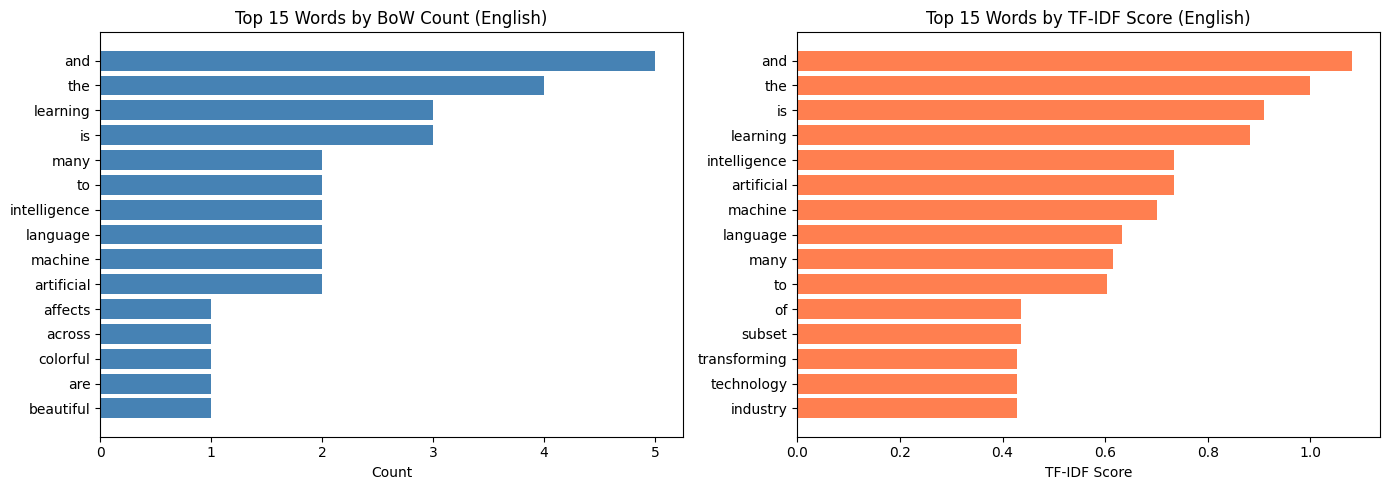

In [10]:
# Visualize word frequencies using BoW
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Sum up word counts across all documents
word_counts_en = bow_df_en.sum().sort_values(ascending=False)[:15]

# Plot BoW frequencies
axes[0].barh(word_counts_en.index, word_counts_en.values, color='steelblue')
axes[0].set_xlabel('Count')
axes[0].set_title('Top 15 Words by BoW Count (English)')
axes[0].invert_yaxis()

# Sum up TF-IDF scores
tfidf_scores_en = tfidf_df_en.sum().sort_values(ascending=False)[:15]

# Plot TF-IDF scores
axes[1].barh(tfidf_scores_en.index, tfidf_scores_en.values, color='coral')
axes[1].set_xlabel('TF-IDF Score')
axes[1].set_title('Top 15 Words by TF-IDF Score (English)')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

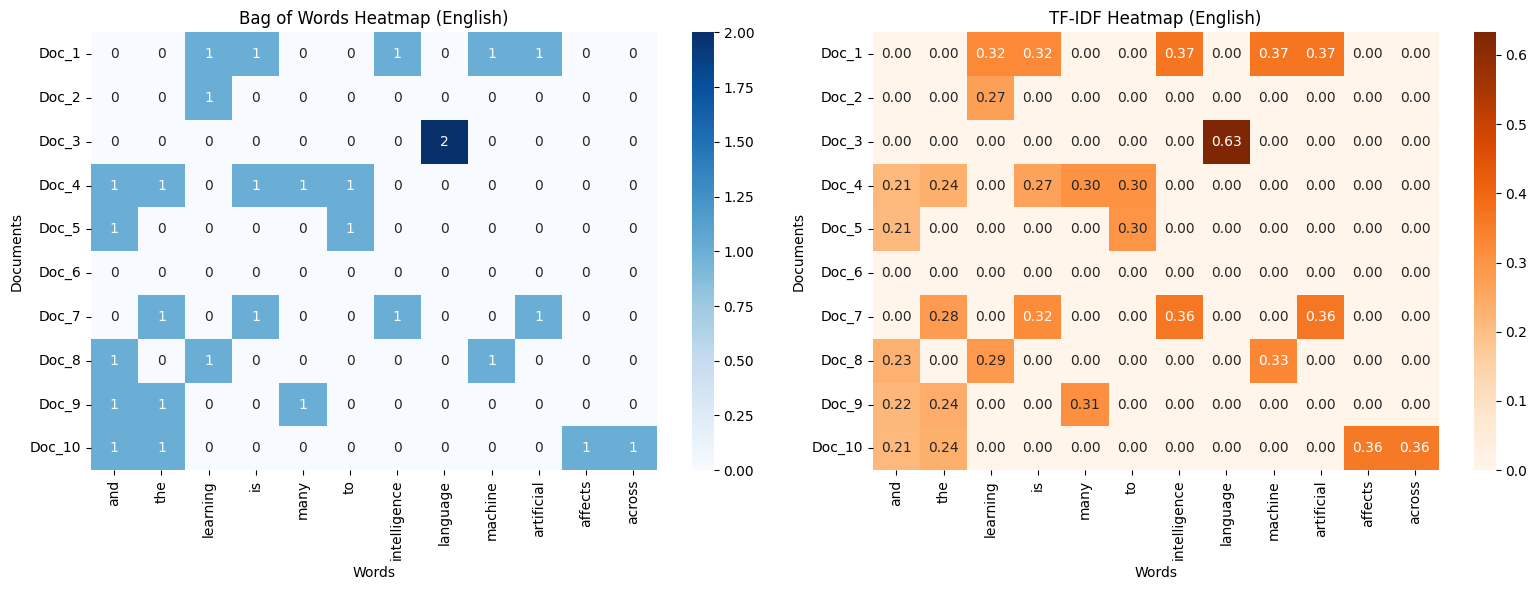

In [11]:
# Heatmap comparison for a subset of features
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Select top features for visualization
top_features = bow_df_en.sum().sort_values(ascending=False)[:12].index

# BoW Heatmap
sns.heatmap(bow_df_en[top_features], annot=True, cmap='Blues', ax=axes[0], fmt='g')
axes[0].set_title('Bag of Words Heatmap (English)')
axes[0].set_xlabel('Words')
axes[0].set_ylabel('Documents')

# TF-IDF Heatmap
sns.heatmap(tfidf_df_en[top_features], annot=True, cmap='Oranges', ax=axes[1], fmt='.2f')
axes[1].set_title('TF-IDF Heatmap (English)')
axes[1].set_xlabel('Words')
axes[1].set_ylabel('Documents')

plt.tight_layout()
plt.show()

## 8. Key Differences: BoW vs TF-IDF

Let's create a comprehensive comparison table.

In [12]:
# Create a detailed comparison table
comparison_data = {
    'Aspect': [
        'Basic Concept',
        'Value Range',
        'Word Importance',
        'Common Words',
        'Rare Words',
        'Document Length',
        'Computation',
        'Sparsity',
        'Use Case',
        'Limitation'
    ],
    'Bag of Words (BoW)': [
        'Counts word occurrences',
        'Integer counts (0, 1, 2, ...)',
        'All words treated equally',
        'High counts (may dominate)',
        'Low counts',
        'Longer docs have higher counts',
        'Simple counting',
        'High (many zeros)',
        'Text classification, simple models',
        'Ignores word importance'
    ],
    'TF-IDF': [
        'Weighs words by importance',
        'Continuous (0.0 to ~1.0)',
        'Weighted by uniqueness',
        'Lower weights (penalized)',
        'Higher weights (rewarded)',
        'Normalized by frequency',
        'TF × IDF calculation',
        'High (many zeros)',
        'Information retrieval, search',
        'Ignores word order/context'
    ]
}

comparison_table = pd.DataFrame(comparison_data)
print("\n" + "="*80)
print("COMPREHENSIVE COMPARISON: Bag of Words vs TF-IDF")
print("="*80 + "\n")
print(comparison_table.to_string(index=False))


COMPREHENSIVE COMPARISON: Bag of Words vs TF-IDF

         Aspect                 Bag of Words (BoW)                        TF-IDF
  Basic Concept            Counts word occurrences    Weighs words by importance
    Value Range      Integer counts (0, 1, 2, ...)      Continuous (0.0 to ~1.0)
Word Importance          All words treated equally        Weighted by uniqueness
   Common Words         High counts (may dominate)     Lower weights (penalized)
     Rare Words                         Low counts     Higher weights (rewarded)
Document Length     Longer docs have higher counts       Normalized by frequency
    Computation                    Simple counting          TF × IDF calculation
       Sparsity                  High (many zeros)             High (many zeros)
       Use Case Text classification, simple models Information retrieval, search
     Limitation            Ignores word importance    Ignores word order/context


## 9. Practical Example: Document Similarity

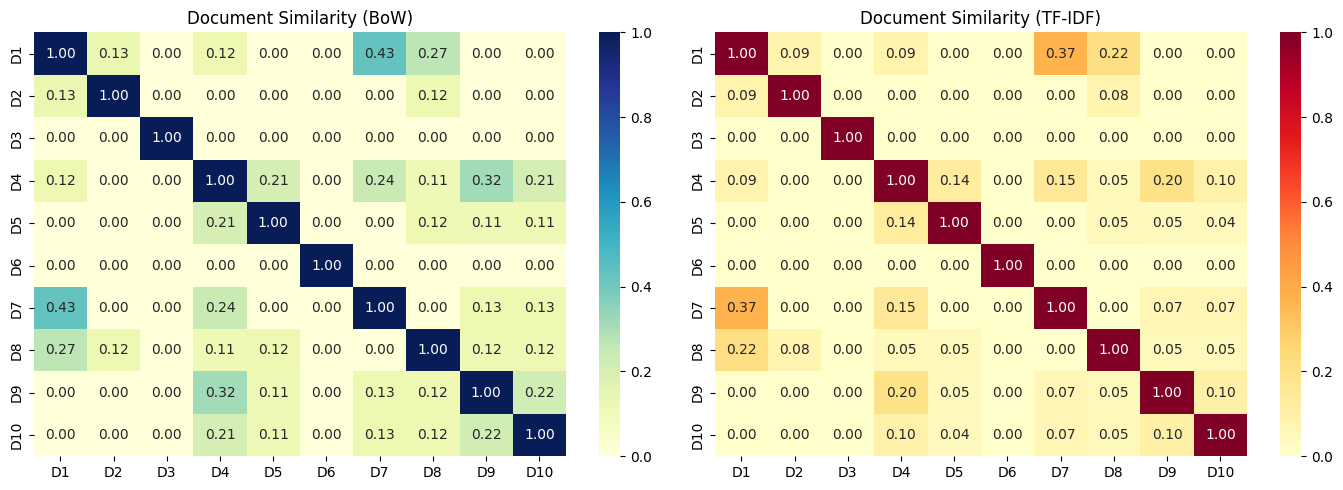


Document Reference:
D1: Machine learning is a subset of artificial intelli...
D2: Deep learning uses neural networks for complex tas...
D3: Natural language processing helps computers unders...
D4: The forest is home to many wild animals and birds
D5: Rivers flow through valleys and provide water to v...
D6: Mountains are covered with snow during winter seas...
D7: Artificial intelligence is transforming the techno...
D8: Data science combines statistics and machine learn...
D9: The beautiful garden has many colorful flowers and...
D10: Climate change affects forests and wildlife across...


In [13]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate cosine similarity using BoW
bow_similarity = cosine_similarity(bow_matrix_en)

# Calculate cosine similarity using TF-IDF
tfidf_similarity = cosine_similarity(tfidf_matrix_en)

# Create DataFrames for visualization
doc_labels = [f'D{i+1}' for i in range(len(english_documents))]

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# BoW Similarity Heatmap
sns.heatmap(bow_similarity, annot=True, fmt='.2f', cmap='YlGnBu',
            xticklabels=doc_labels, yticklabels=doc_labels, ax=axes[0])
axes[0].set_title('Document Similarity (BoW)')

# TF-IDF Similarity Heatmap
sns.heatmap(tfidf_similarity, annot=True, fmt='.2f', cmap='YlOrRd',
            xticklabels=doc_labels, yticklabels=doc_labels, ax=axes[1])
axes[1].set_title('Document Similarity (TF-IDF)')

plt.tight_layout()
plt.show()

print("\nDocument Reference:")
for i, doc in enumerate(english_documents):
    print(f"D{i+1}: {doc[:50]}..." if len(doc) > 50 else f"D{i+1}: {doc}")

## 10. Advanced Options: N-grams

In [14]:
# Using bigrams (2-word combinations)
bigram_vectorizer = CountVectorizer(ngram_range=(2, 2))
bigram_matrix = bigram_vectorizer.fit_transform(english_documents)

print("Bigram (2-word) Features:")
print(f"Number of bigram features: {len(bigram_vectorizer.get_feature_names_out())}")
print("\nSample bigrams:")
print(list(bigram_vectorizer.get_feature_names_out())[:20])

Bigram (2-word) Features:
Number of bigram features: 71

Sample bigrams:
['across the', 'affects forests', 'and birds', 'and machine', 'and plants', 'and provide', 'and wildlife', 'animals and', 'are covered', 'artificial intelligence', 'beautiful garden', 'change affects', 'climate change', 'colorful flowers', 'combines statistics', 'complex tasks', 'computers understand', 'covered with', 'data science', 'deep learning']


In [15]:
# Combined unigrams and bigrams
combined_vectorizer = TfidfVectorizer(ngram_range=(1, 2))
combined_matrix = combined_vectorizer.fit_transform(english_documents)

print("Combined Unigram + Bigram TF-IDF:")
print(f"Total features: {len(combined_vectorizer.get_feature_names_out())}")
print(f"Matrix shape: {combined_matrix.shape}")

Combined Unigram + Bigram TF-IDF:
Total features: 137
Matrix shape: (10, 137)


## 11. Summary and Conclusions

### When to Use BoW:
- Simple text classification tasks
- When word frequency matters more than importance
- Quick baseline models
- Small datasets

### When to Use TF-IDF:
- Information retrieval and search engines
- Document similarity comparison
- When distinguishing important words matters
- Filtering out common/stop words naturally

### Key Takeaways:
1. **BoW** gives raw counts - simple but treats all words equally
2. **TF-IDF** weighs words by importance - better for distinguishing documents
3. Both methods lose word order and context
4. Modern NLP often uses embeddings (Word2Vec, BERT) for better representations
5. For Nepali text, proper tokenization is crucial due to script differences

In [16]:
# Final summary statistics
print("="*60)
print("SUMMARY STATISTICS")
print("="*60)

print("\n📊 English Dataset:")
print(f"   - Documents: {len(english_documents)}")
print(f"   - Vocabulary Size: {len(bow_features_en)}")
print(f"   - BoW Matrix Shape: {bow_matrix_en.shape}")
print(f"   - TF-IDF Matrix Shape: {tfidf_matrix_en.shape}")
print(f"   - Sparsity: {(1 - bow_matrix_en.nnz / (bow_matrix_en.shape[0] * bow_matrix_en.shape[1])) * 100:.2f}%")

print("\n📊 Nepali Dataset:")
print(f"   - Documents: {len(nepali_documents)}")
print(f"   - Vocabulary Size: {len(bow_features_np)}")
print(f"   - BoW Matrix Shape: {bow_matrix_np.shape}")
print(f"   - TF-IDF Matrix Shape: {tfidf_matrix_np.shape}")
print(f"   - Sparsity: {(1 - bow_matrix_np.nnz / (bow_matrix_np.shape[0] * bow_matrix_np.shape[1])) * 100:.2f}%")

print("\n✅ Notebook completed successfully!")

SUMMARY STATISTICS

📊 English Dataset:
   - Documents: 10
   - Vocabulary Size: 66
   - BoW Matrix Shape: (10, 66)
   - TF-IDF Matrix Shape: (10, 66)
   - Sparsity: 87.58%

📊 Nepali Dataset:
   - Documents: 10
   - Vocabulary Size: 34
   - BoW Matrix Shape: (10, 34)
   - TF-IDF Matrix Shape: (10, 34)
   - Sparsity: 86.76%

✅ Notebook completed successfully!
